<a href="https://colab.research.google.com/github/ChenZijiSubset/coding_class/blob/main/01_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1 style="color:maroon">Data Science and Machine Learning</h1>

## Intended learning outcomes 👨🏿‍🎓

* Introduction to Data Science
* Consolidate your NumPy and Pandas skills
* Confidently preprocess data for analysis
* Basic use of the Scikit-learn Library

### Dataset

<span style="color:teal">**Todays's dataset:**</span><a href="https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india"> India air quality data, Kaggle</a>

Run this cell to mount your Google Drive.

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
# df is your pandas.DataFrame. to_markdown requires tabulate

data = pd.read_csv('/content/drive/MyDrive/India_air_quality.csv')
data.head()

,stn_code,state,location,type,so2,no2,rspm,spm,pm2_5,date,rainfall
0,NaN,Andhra Pradesh,Hyderabad,Others,5.1,14.2,50.0,128.0,NaN,29/02/2008,NaN
1,229,Odisha,Rayagada,Industrial,2.0,14.5,36.0,54.0,NaN,08/04/2010,53.897548
2,631,Goa,Honda,Residential,5.0,11.0,42.0,19.0,NaN,10/11/2013,NaN
3,674,Karnataka,Davangere,Residential,6.0,9.0,302.0,NaN,NaN,02/01/2015,95.685937
4,NaN,West Bengal,Kolkata,Industrial,7.4,69.5,77.0,164.0,NaN,20/08/2007,83.049383


## Ensuring Generalization


The performance of a Machine Learning model is evaluated on its ability to **generalize** when predicting **unseen data**.

We ensure that a model that we train on data generalizes well by testing it on unseen data!


### Dealing with duplicates


* Unwanted duplicated observations can discredit the performance evaluation of a model because the same data can leak from the training set to the test set.

🚨 **REMOVING DUPLICATES IS THE ONLY OPERATION THAT NEEDS TO BE DONE BEFORE SPLITTING THE DATASET**

### 💻 <code>drop_duplicates</code>


In [30]:
# Check number of duplicates
data.duplicated().sum()

400

In [31]:
# Remove duplicates
data = data.drop_duplicates()

In [32]:
# Check number of duplicates
data.duplicated().sum()

0

### Splitting data with the Holdout Method
The Holdout Method is used to evaluate a model's ability to generalize. It consists of splitting the dataset into two sets:

* **Training set** (~70%)
* **Testing set** (~30%)


### 💻 <code>train_test_split</code>

In [33]:
from sklearn.model_selection import train_test_split

# Split the dataset
train_set, test_set,  = train_test_split(data, test_size=0.3)

## Exploratory Data Analysis (EDA)

* A mix of statistics of tabular data and graphic exploration of the data

* Applied **AFTER** splitting the data and **ONLY** on the training set

* A crucial step to understand your data

🏃‍♀️ You will learn how to **EDA** in your exercise...

## Missing Data

### Common representations
* <code>NaN</code> (not a number)
* Large negatives (-99,-999)
* ?
* Infinity

🚨 Missing data does not necessarily mean no information! Some categories could be `NaN` and still valid

### 💡Suggestion:
* Greater than 30% of values missing: Potentially drop feature or row
* Less than 30% of values missing: impute a value that makes sense e.g. Median, mean, mode.


🏃‍♀️ You will learn how to **handle missing data** in your exercise...

### 🖥 Sklearn's <code>SimpleImputer</code>
<code>SimpleImputer</code> is a data <code>Transformer</code> to replace missing values by a strategy of your choice e.g. mean. <br><br>
👉<a href="https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html">Sklearn <code>SimpleImputer()</code> documentation</a>


<code>imputer.fit()</code>
* Computes the strategy for that feature
* Stores the strategy value as an attribute

<code>imputer.transform()</code>
* Identifies missing values  
* Replaces missing value with previously calculated strategy value

In [34]:
from sklearn.impute import SimpleImputer
import numpy as np

num_cols = train_set.select_dtypes(include=np.number).columns # redo numerical columns

imputer = SimpleImputer(strategy="mean") # Instanciate a SimpleImputer object with strategy of choice

In [35]:
imputer.fit(train_set[num_cols]) # Call the "fit" method on the object, using X_train numerical data

SimpleImputer()

In [36]:
train_set[num_cols] = imputer.transform(train_set[num_cols]) # Call the "transform" method on the object

In [37]:
imputer.statistics_ # The mean is stored in the transformer's memory

array([ 11.13567126,  26.39002157, 108.18695808, 217.58224959,
        40.75616528,  79.93120083])

### How about the categorical data?

In [38]:
cat_cols = train_set.select_dtypes(exclude=np.number).columns
cat_imputer = SimpleImputer(strategy="most_frequent") # Instanciate a SimpleImputer object with "most_frequent" strategy

train_set[cat_cols] = cat_imputer.fit_transform(train_set[cat_cols]) # can 'fit_transform' in one line...

# Data Preprocessing

## Outliers

Outliers affect:
* Dataset distributions and patterns
* Central tendency metrics e.g. mean and standard deviation
* Machine learning models' performances

### Boxplot to detecting outliers
We can use boxplots to easily visualize outliers within our dataset.


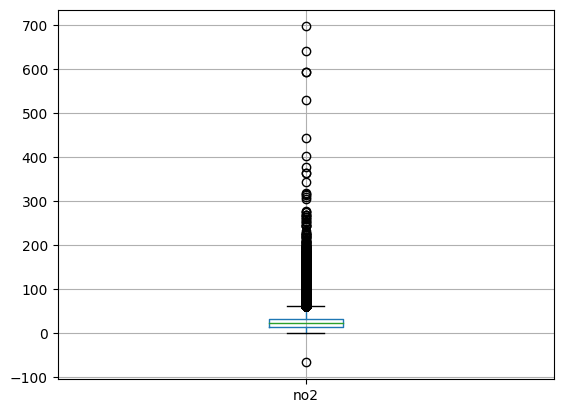

In [39]:
train_set[['no2']].boxplot();

In [40]:
# Does this look sensible?
train_set['no2'].min()

-66.4

🏃‍♀️ You will learn how to **drop outliers** in your exercise...

## Feature Scaling

Why do we need to scale our data?

* Features with large magnitudes can incorrectly outweigh features of small magnitudes

* Scaling to smaller magnitudes improves computational efficiency

* Increases interpretability of coefficients in parametric models

* Essential for 'distance-based' models

## Three common scaling algorithms
* 👉 **Standardizing**: Sklearn <code>StandardScaler()</code>
$$z =  \frac{(x - mean)}{std}$$

* 👉 **Robust Scaling**: Sklearn <code>RobustScaler()</code>
$$Robust Scaled = \frac{(x - median)}{IQR}$$

* 👉 **Normalizing**: Sklearn <code>MinMaxScaler()</code>
$$X' =  \frac{(X - X_{min})}{X_{max} - X_{min}}$$

### Standardization:
* Most effective when data is normally distributed
* Does not ensure an exact common range
* Sensitive to outliers
* Can distort relative distances between feature values

### Robust Scaling:
* Similar to standardization but more robust to outliers

### Normalizing:
* Ensures a fixed range, important with distance based algorithms like the K-Nearest Neighbours
* Efficient regardless of distribution
* Doesn't reduce the effect of outliers
* Doesn't correct the skewness of a distribution


## 💻  Scaling in Sklearn

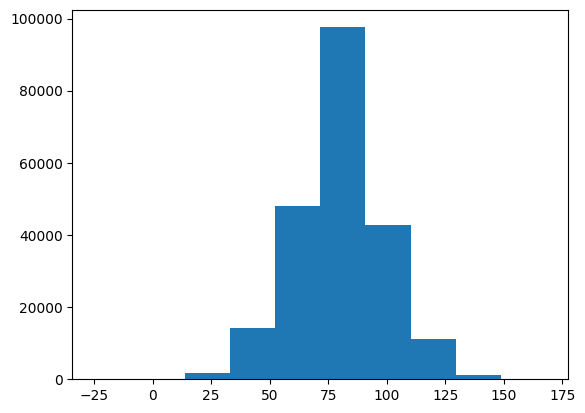

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

plt.hist(train_set.rainfall); # Check feature distribution

Comparing <code>standardization</code>, <code>robust scaling</code> and <code>normalization</code> for <code>rainfall</code>

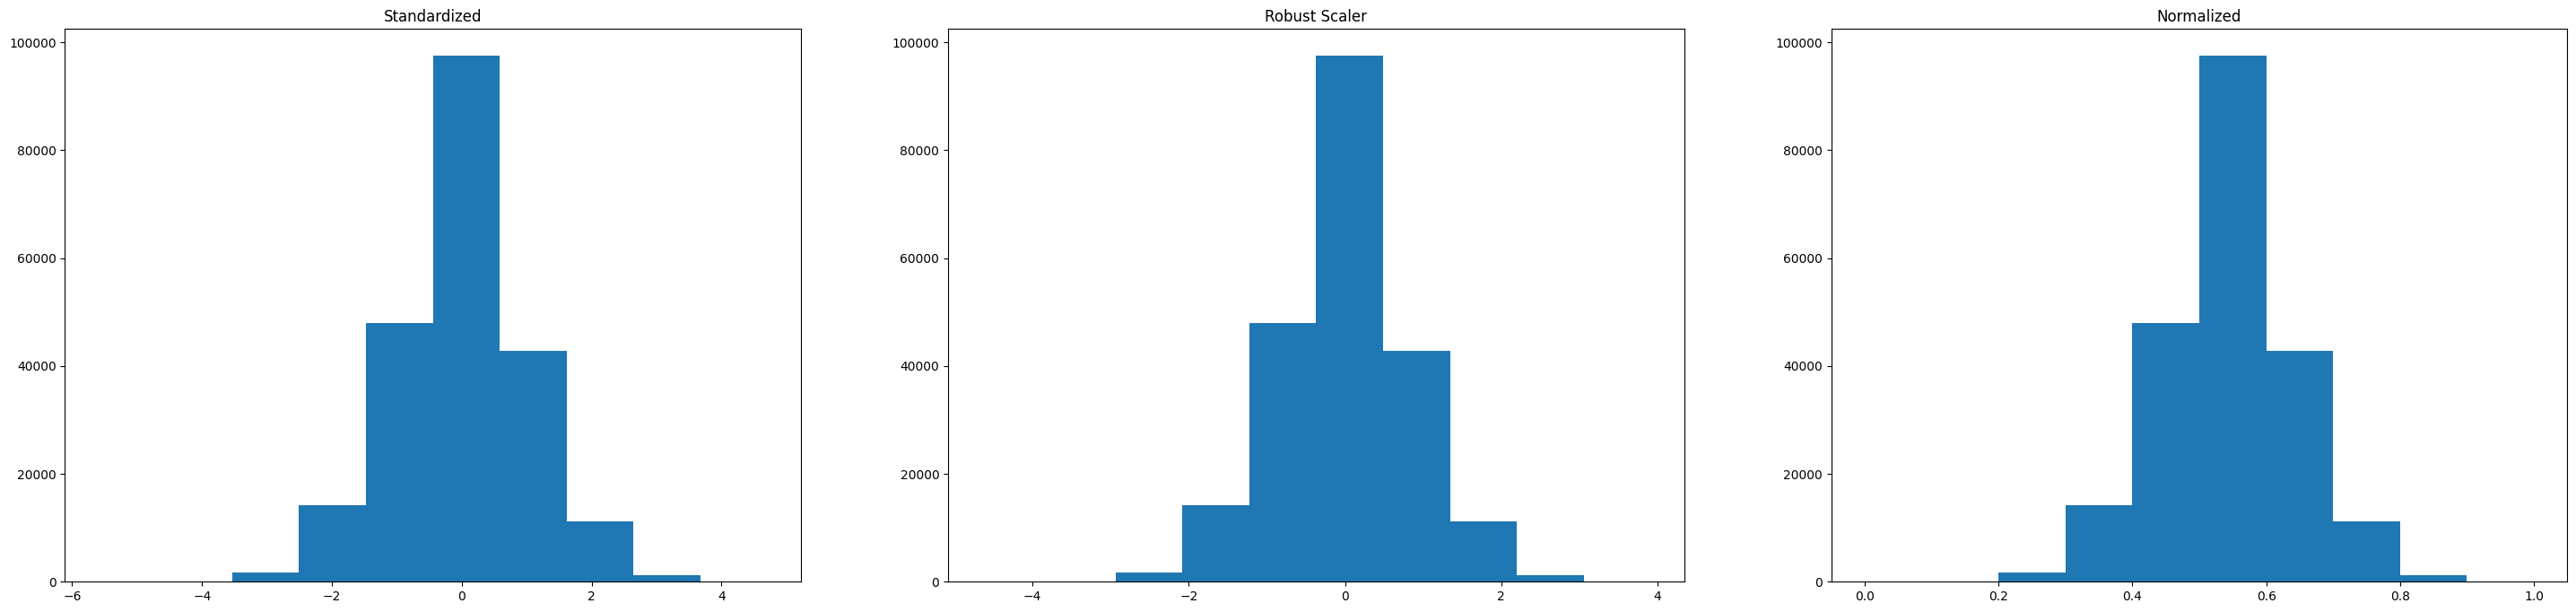

In [42]:
standardized = StandardScaler().fit_transform(train_set[['rainfall']]) # Use scaler to transform data
normalized = MinMaxScaler().fit_transform(train_set[['rainfall']])
robust = RobustScaler().fit_transform(train_set[['rainfall']])

fig, axes = plt.subplots(1,3, figsize=(36,8))

for data, ax, title in zip([standardized, robust, normalized],
                           axes.flatten(),
                            ['Standardized', 'Robust Scaler','Normalized']):
    ax.hist(data)
    ax.set_title(title)



Comparing <code>standardization</code>, <code>robust scaling</code> and <code>normalization</code> for <code>NO2</code>

# Feature Engineering

**Feature engineering** is a category of preprocessing that includes encoding, discretizing and creating new features 💡


## Separating target from features
* We don't want to scale/engineer our target
* Here we will try to predict <code>'rspm'</code>, so we will remove them and derived data (<code>pm2_5</code> and <code>spm</code>) from the features


In [43]:
y_train = train_set['rspm']
X_train = train_set.drop(columns=['rspm', 'spm','stn_code', 'state', 'location', 'type','date'])

## Creating / transforming features
* Create additional information
* Reduce number of features by combining them
* Change data distribution
* Potentially improve model performance


🏃‍♀️ You will learn how to **transform features to log space** in your exercise...

## Discretizing / 'Binning'

Useful in order to:
* Turn a regression task into a classification task
* Perform feature engineering
👉 <a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html">Pandas <code>cut()</code> documentation</a>


### 🖥 Discretizing rspm
* Let's turn this dataset into a classification task, low or high pollution, according to a cutoff value of 2 standard deviation above the mean (chosen randomly here to represent 'high' pollution).


In [44]:
y_train_cat = pd.cut(x = y_train,
                       bins=[y_train.min()-1,
                             y_train.mean()-0.25*y_train.std(),
                             y_train.max()+1],
                       labels=['low', 'high'])

y_train_cat[:5]

,rspm
42882,high
55114,low
282853,low
45263,high
163260,high


## Encoding

### Why encoding?
* Data may be represented as words, letters, or symbols
* Most Machine Learning algorithms only process numerical data

### Target Encoding (aka label encoding)
Assign a number to each category.



👉 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Sklearn <code>LabelEncoder()</code> documentation</a>


### One-Hot-Encoding
Create a binary column for each possible category: used with features.



👉 <a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html">Sklearn <code>OneHotEncoder()</code> documentation</a>


### 💻 One-hot-Encoding <code>type</code>

In [45]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

ohe = OneHotEncoder(sparse = False) # Instanciate encoder: sparse=False => returns a numpy array (as opposed to a sparse matrix)

ohe.fit(train_set[['type']]) # Fit encoder
type_encoded = ohe.transform(train_set[['type']]) # Encode type
train_set[ohe.categories_[0]] = type_encoded

train_set.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,stn_code,state,location,type,so2,no2,rspm,spm,pm2_5,date,rainfall,Industrial,Others,Residential,Sensitive
42882,767,Tamil Nadu,Chennai,Residential,11.000000,24.0,102.0,217.58225,40.756165,22/08/2013,77.195773,0.0,0.0,1.0,0.0
55114,710,Madhya Pradesh,Jabalpur,Others,11.135671,18.7,63.0,137.00000,40.756165,18/07/2007,71.236899,0.0,1.0,0.0,0.0
282853,640,Maharashtra,Chandrapur,Industrial,4.000000,9.0,60.0,217.58225,40.756165,09/03/2012,79.931201,1.0,0.0,0.0,0.0
45263,710,Maharashtra,Amravati,Others,13.700000,15.7,119.0,217.58225,40.756165,04/01/2009,77.496284,0.0,1.0,0.0,0.0
163260,710,Delhi,Delhi,Others,7.600000,37.3,169.0,619.00000,40.756165,04/10/2006,66.173239,0.0,1.0,0.0,0.0


#### One-Hot-Encoding vs Dummy Encoding
* One-Hot-Encoder creates one column per category
* Dummy encoder creates one column per category minus one (the last one is inferred from the others)

#### One-Hot-Encoding  (Sklearn default)
<span style="color:blue">**Pros**</span>
* All columns preserved

<span style="color:red">**Cons**</span>
* Can create colinearity between variables in linear models without regularization

#### Dummy Encoding
<span style="color:blue">**Pros**</span>
* No colinearity
* Dimensionality of data is reduced

<span style="color:red">**Cons**</span>
* Loose some information

## Dummy Encoding in `sklearn`

Dummy encoding can easily be done in `sklearn` simply by droping one category. For instance:

<code>ohe = OneHotEncoder(sparse = False, drop=['Others'])</code>

🚨 The `categories_` property of the encoder still retains all of the original names: you need to manually adapt it if you want to use the column names

# Modelling

### linear_model module
* <code>linear_model</code> is a module
* <code>LinearRegression</code> is a class
👉 <a href="https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model">Sklearn <code>linear_model</code> documentation</a>

***Ordinary Least Square (OLS) regression [a reminder]*** <br><br>
For ordinary least square, we can define our prediction as:

$\hat{y} = (\beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n - \beta_0)$ <br><br>

where $\beta_i$ is a linear coefficient to the function and $\beta_0$ is the intercept.

We can rewrite this more simply using matrix notation:

$\hat{y} = \beta X$ <br><br>
Where $X$ is the feature matrix (multivariate regression) and $\beta$ is the matrix of coefficients. Note that a constant (<code>1</code>) is added to the feature matrix ($X_{0}$) to account for the intercept ($\beta_{0}$).

The goal is to find the $\beta$ that minimizes the **residual sum of square** between our label ($y$) and $\hat{y}$:<br><br>
$$\underset{\beta}{\mathrm{argmin}} \sum_{i=1}^{n} \left(y_{i} - \hat{y}_{i} \right)^2$$ <br><br>



### Modelling rspm vs other variables

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [47]:
# predicting our train_set back!

y_pred = model.predict(X_train)

y_pred

array([104.85570956,  97.57369773,  82.39743658, ..., 102.85471463,
       109.4411645 ,  98.75130041])

### Testing our work with K-fold cross validation

* K-fold cross validation is typically used on the **training set** to guide our choices of data preparation and model parameters (using the test set would violate the philosophy of testing on unseen data)

* The dataset is split into K number of folds

* For each split, a sub model is trained and scored

* The average score of all sub models is the **cross-validated** score of the model

### Choosing K
* Choosing K is a tradeoff between trustworthy performance evaluation and computational expense
* More K-folds --&gt; more submodels to average scores from --&gt; more representative score --&gt; more computational time



👍 Rule of thumb: K = 5 to 10

### 💻 <code>K-fold cross validation</code>

In [48]:
from sklearn.model_selection import cross_validate

# Instanciate model
model = LinearRegression()

In [49]:
# 5-Fold Cross validate model
cv_results = cross_validate(model, X_train, y_train, cv=5)

In [50]:
# Scores
cv_results['test_score']

array([0.13378238, 0.1255764 , 0.12677445, 0.13350363, 0.13096527])

In [51]:
# Mean of scores
cv_results['test_score'].mean()

0.13012042712607674

# Parametric vs Non-Parametric models


We have seen that some models can be summarized by a set of parameters:


***Ordinary Least Square (OLS) regression*** <br><br>

$\hat{y} = \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n - \beta_0$ <br><br>

* If the parameters $\beta$ of the functions are learned, these can be used to predict unknown samples

* There are also non-parametric algorithm!

# Suggested Resources

## 📺 Videos

*General videos about Python and its ecosystem (relates to your previous modules)*:
* 📼 <a href="https://youtu.be/uteQkMvGnXk?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">General Introduction</a>
* 📼 <a href="https://youtu.be/jKZ3w1Hego4?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">What are Data Science and Machine Learning?</a>
* 📼 <a href="https://youtu.be/v9XwNlVuQe0?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Physics-driven vs Data-driven models</a>
* 📼 <a href="https://youtu.be/am5uahXNwxU?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Jupyter Notebooks</a>
* 📼 <a href="https://youtu.be/qZpmc_LQ55k?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Properties of Python</a>
* 📼 <a href="https://youtu.be/l5ZUOMAv948?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">The Art of Clean Code</a>
* 📼 <a href="https://youtu.be/NLqkYpK0PsI?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Introduction to NumPy</a>
* 📼 <a href="https://youtu.be/eSMb1Xe2svM?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Computation with NDArrays</a>
* 📼 <a href="https://youtu.be/jox3od5OB4k?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Introduction to Pandas</a>
* 📼 <a href="https://youtu.be/SQgrAdeZcLg?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Plotting Data with Matplotlib</a>
* 📼 <a href="https://youtu.be/plyX3n7a0lM?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Linear Algebra notation</a>

*Videos directly related to this lecture*:
* 📼 <a href="https://youtu.be/YKRzY9oKwU8?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Data Preparation Overview</a>
* 📼 <a href="https://youtu.be/aOAiJtNs-4Q?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Why Splitting data matters</a>
* 📼 <a href="https://youtu.be/SieI_0PP5xM?list=PLZzjCZ3QdgQCcRIwQdd-_cJNAUgiEBB_n">Feature Scaling</a>

## 📚 Further Reading
* 📖 <a href="https://www.kdnuggets.com/2019/07/check-quality-regression-model-python.html">A deep dive into Linear regression in Scikit-Learn</a> by Tirthajyoti Sarkar
* 📖 <a href="https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/">Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow, 2nd Edition</a> by Aurélien Geron (chapters 1 and 4)
* 📖 <a  href="https://www.ime.unicamp.br/~dias/Intoduction%20to%20Statistical%20Learning.pdf">An introduction to statistical learning</a> by James et al (uses R, not Python)
* 📖 <a href="https://pdfhost.io/pdf/331cead5-4dd6-455a-9d10-17d4e12df608/8a19e1bf-c7c2-4b4d-a671-457928e79bfa.pdf">Andrew NG - Linear Models CS229 Notes</a>
* 📖 <a href="https://www.mygreatlearning.com/blog/knn-algorithm-introduction/">A good introduction to KNN</a> by Marina Chatterjee